In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

import thesis
chapter = 'theory'
save = True

In [2]:
from kid_readout.analysis.resonator import equations

In [3]:
sweep_color = 'gray'
response_color = 'red'

In [4]:
f = np.linspace(3499e6, 3501e6, 10000)
f_0 = 3500e6
loss_i = 1e-5
loss_c = 3e-5
asymmetry = 0
s21 = equations.linear_loss_resonator(f=f, f_0=f_0, loss_i=loss_i, loss_c=loss_c, asymmetry=asymmetry)

betas = [3, 9, 27]
s21s = []
dx = 50e-6
num_points = 20
xx = np.linspace(0, dx, num_points)
ff = f_0 * (1 - xx)
for beta in betas:
    ii = loss_i + np.linspace(0, 2 * dx / beta, num_points)
    s21s.append(equations.linear_loss_resonator(f=f_0, f_0=ff, loss_i=ii, loss_c=loss_c, asymmetry=asymmetry))

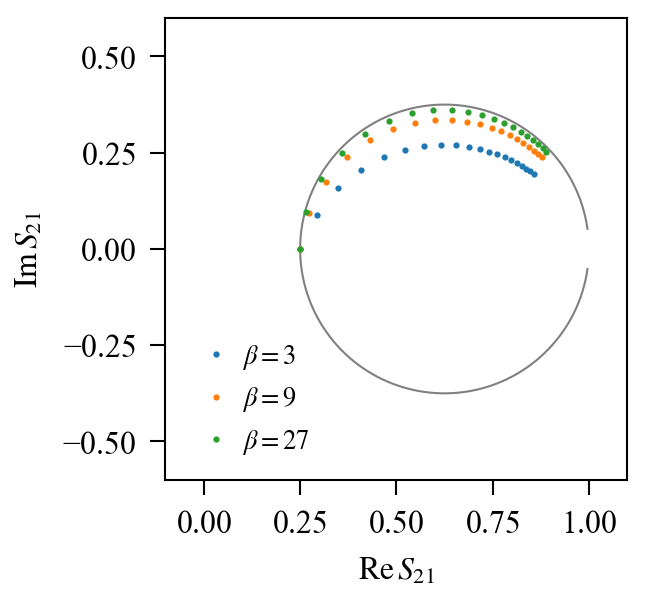

In [5]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.plot(s21.real, s21.imag, color=sweep_color)
for beta, d_s21 in zip(betas, s21s):
    ax.plot(d_s21.real, d_s21.imag, '.', label='$\\beta = {:.0f}$'.format(beta))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.6, 0.6)
ax.set_xticks(np.linspace(0, 1, 5))
ax.set_yticks(np.linspace(-0.5, 0.5, 5))
ax.legend(loc='lower left', fontsize='xx-small', handletextpad=0)
ax.set_xlabel('$\\mathrm{{Re}} \\, S_{{21}}$', fontsize='x-small')
ax.set_ylabel('$\\mathrm{{Im}} \\, S_{{21}}$', fontsize='x-small')
ax.tick_params(labelsize='x-small')

if save:
    fig.savefig(thesis.full_filename(chapter, 's21_response.pdf'))